# Part I - (Loan Dataset Prosper)
## by (Mgbekwute Jecinta Obianuju)

## Introduction
 This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate, current loan status and borrower income etc.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# load in the dataset into a pandas dataframe,print statistics
prosperloan=pd.read_csv('prosperLoanData.csv')



In [3]:
# high-level overview of data shape
prosperloan.shape

(113937, 81)

In [4]:
# high-level overview of composition
prosperloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
# high-level overview of data sample
prosperloan.tail(15)

ListingKey  ListingNumber            ListingCreationDate  \
113922  D2293427338962159DA5143         379986  2008-08-08 16:58:54.760000000   
113923  E334343080922352965DF86         395877  2008-09-10 08:26:30.537000000   
113924  E340356181565702714DBCE         657862  2012-10-20 19:15:52.670000000   
113925  E3423576946812123E4798D         760946  2013-04-25 13:54:45.017000000   
113926  E34333654295683286C35C2          28121  2006-08-01 10:31:31.143000000   
113927  E3433419834735803891976         322787  2008-04-30 21:25:19.670000000   
113928  E34935176664905343E01EA         510097  2011-06-06 19:02:44.443000000   
113929  E3553583161337791FCB87F         830413  2013-07-06 17:40:01.657000000   
113930  E35D3584034795373BCD69A         831523  2013-07-08 10:24:49.700000000   
113931  E36F36005339663245C20F8        1141292  2014-01-16 20:13:08.040000000   
113932  E6D9357655724827169606C         753087  2013-04-14 05:55:02.663000000   
113933  E6DB353036033497292EE43         537216  2011-11-03 20:42:55.333000000   
113934  E6E13596170052029692BB1        1069178  2013-12-13 05:49:12.703000000   
113935  E6EB3531504622671970D9E         539056  2011-11-14 13:18:26.597000000   
113936  E6ED3600409833199F711B7        1140093  2014-01-15 09:27:37.657000000   

       CreditGrade  Term              LoanStatus           ClosedDate  \
113922           C    36               Completed  2011-08-19 00:00:00   
113923           B    36               Completed  2011-09-23 00:00:00   
113924         NaN    60                 Current                  NaN   
113925         NaN    36                 Current                  NaN   
113926           E    36               Defaulted  2007-09-06 00:00:00   
113927          AA    36               Completed  2011-05-09 00:00:00   
113928         NaN    36               Completed  2011-09-19 00:00:00   
113929         NaN    36               Completed  2014-02-07 00:00:00   
113930         NaN    36                 Current                  NaN   
113931         NaN    60                 Current                  NaN   
113932         NaN    36                 Current                  NaN   
113933         NaN    36  FinalPaymentInProgress                  NaN   
113934         NaN    60                 Current                  NaN   
113935         NaN    60               Completed  2013-08-13 00:00:00   
113936         NaN    36                 Current                  NaN   

        BorrowerAPR  BorrowerRate  LenderYield  ...  LP_ServiceFees  \
113922      0.15094        0.1295       0.1195  ...          -81.95   
113923      0.22378        0.2089       0.1989  ...         -135.50   
113924      0.17317        0.1499       0.1399  ...          -60.83   
113925      0.31032        0.2712       0.2612  ...          -27.92   
113926      0.29776        0.2900       0.2850  ...           -9.34   
113927      0.07469        0.0679       0.0579  ...          -68.47   
113928      0.22362        0.1899       0.1799  ...           -4.41   
113929      0.30285        0.2639       0.2539  ...           -6.54   
113930      0.20053        0.1639       0.1539  ...          -16.51   
113931      0.15016        0.1274       0.1174  ...          -21.23   
113932      0.22354        0.1864       0.1764  ...          -75.58   
113933      0.13220        0.1110       0.1010  ...          -30.05   
113934      0.23984        0.2150       0.2050  ...          -16.91   
113935      0.28408        0.2605       0.2505  ...         -235.05   
113936      0.13189        0.1039       0.0939  ...           -1.70   

        LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
113922                0.0                   0.00                  0.0   
113923                0.0                   0.00                  0.0   
113924                0.0                   0.00                  0.0   
113925                0.0                   0.00                  0.0   
113926                0.0                2536.11     

In [6]:

# convert ProsperRating into ordered categorical types
ordinal_var_dict ={'ProsperRating (Alpha)': ['N/A','HR','E','D','C','B','A','AA']}
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    prosperloan[var] = prosperloan[var].astype(ordered_var)



In [7]:
# descriptive statistics for numerical variables
prosperloan.describe()

ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.004900        -0.182700   
25%         0.124200                 0.115670       0.042400         0.074080   
50%         0.173000                 0.161500       0.072400         0.091700   
75%         0.240000                 0.224300       0.112000         0.116600   
max         0.492500                 0.319900       0.366000         0.283700   

       ProsperRating (numeric)  ProsperScore  ...  LP_ServiceFees  \
count             84853.000000  84853.000000  ...   113937.000000   
mean                  4.072243      5.950067  ...      -54.725641   
std                   1.673227      2.376501  ...       60.675425   
min                   1.000000      1.000000  ...     -664.870000   
25%                   3.000000      4.000000  ...      -73.180000   
50%                   4.000000      6.000000  ...      -34.440000   
75%                   5.000000      8.000000  ...      -13.920000   
max                   7.000000     11.000000  ...       32.060000   

       LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
count      113937.000000          113937.000000        113937.000000   
mean          -14.242698             700.446342           681.420499   
std           109.232758            2388.513831          2357.167068   
min         -9274.750000             -94.200000          -954.550000   
25%             0.000000               0.000000             0.000000   
50%             0.000000               0.000000             0.000000   
75%             0.000000               0.000000             0.000000   
max             0.000000           25000.000000         25000.000000   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
count                    113937.000000  113937.000000    113937.000000   
mean                         25.142686       0.998584         0.048027   
std                         275.657937       0.017919         0.332353   
min                           0.000000       0.700000         0.000000   
25%                           0.000000       1.000000         0.000000   
50%                           0.000000       1.000000         0.000000   
75%                           0.000000       1.000000         0.000000   
max                       21117.900000       1.012500        39.000000   

       InvestmentFromFriendsCount  InvestmentFromFriendsAmount      Investors  
count               113937.000000                113937.000000  113937.000000  
mean                     0.023460                    16.550751      80.475228  
std                      0.232412                   294.545422     103.239020  
min                      0.000000                     0.000000       1.000000  
25%                      0.000000                     0.000000       2.000000  
50%                      0.000000                     0.000000      44.000000  
75%                      0.000000                     0.000000     115.000000  
max                     33.000000                 25000.000000    1189.000000

### What is the structure of your dataset?

The structure of my data set is that in columns there are 59 numerical variables and 22 categorical variable that makes up the 113937 loans of the dataset

### What is/are the main feature(s) of interest in your dataset?
i will be analysing MonthlyLoanPayment,EmploymentStatuesDuration,BorrowersRate,ProsperRating(Alpha)and OnTimeProsperPayment 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I believe using Term I can ascertain the OnTimeProsperPayment.StatedMonthlyIncome alongside LoanOriginalAmount can also support the investigation

## Univariate Exploration

First i will be looking at the distribution of each of the features 


In [8]:
def my_function(x,binsize):
    binsize=binsize
    bins= np.arange(0,prosperloan[x].max()+binsize,binsize)
    plt.hist(x,data=prosperloan,bins=bins)
    plt.xlabel(x)
    plt.title(f'{x} Distribution')

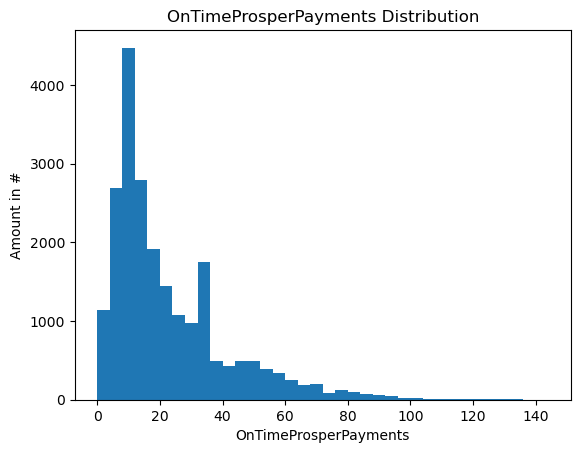

In [9]:
# = np.arange(0,prosperloan['OnTimeProsperPayments'].max()+binsize, binsize)
binsize=4
my_function('OnTimeProsperPayments',binsize)
plt.ylabel('Amount in #');

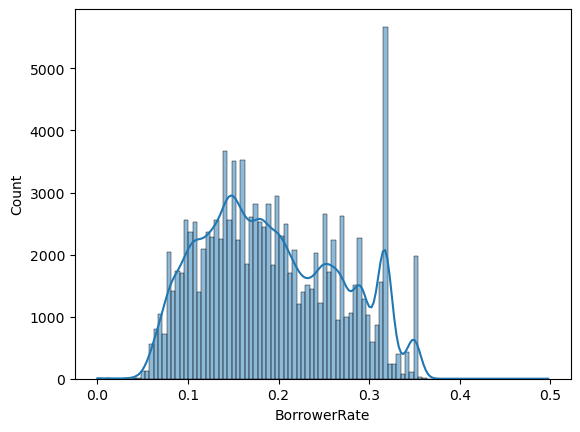

In [10]:
#plot of BorrowerRate on Standard plot
sb.histplot(prosperloan['BorrowerRate'],kde=True);


From the graph it shows that there is an average borrower rate within 0.1 to 0.3

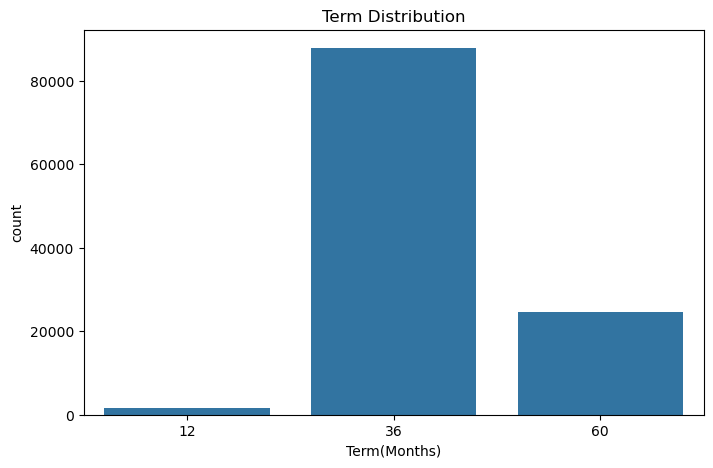

In [11]:
# plot of Term(Duration of the Loan in Month)
ax = plt.figure(figsize =[8,5])

default_color = sb.color_palette()[0]
sb.countplot(data = prosperloan, x = 'Term', color = default_color)
plt.title('Term Distribution')
plt.xlabel('Term(Months)');

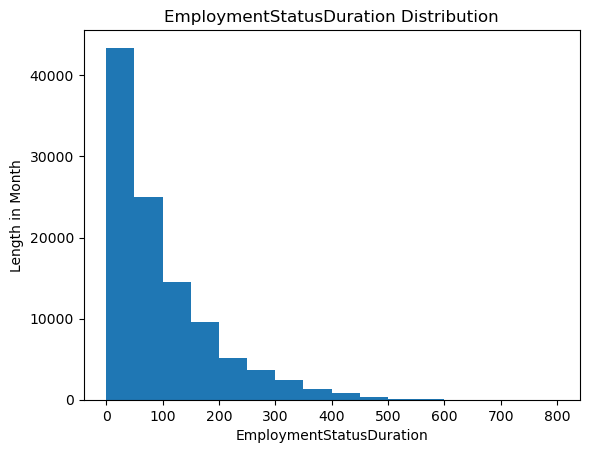

In [12]:
#Plot of EmploymentStatusDuration on Standard plot
binsize=50
my_function('EmploymentStatusDuration',binsize)  
plt.ylabel('Length in Month');

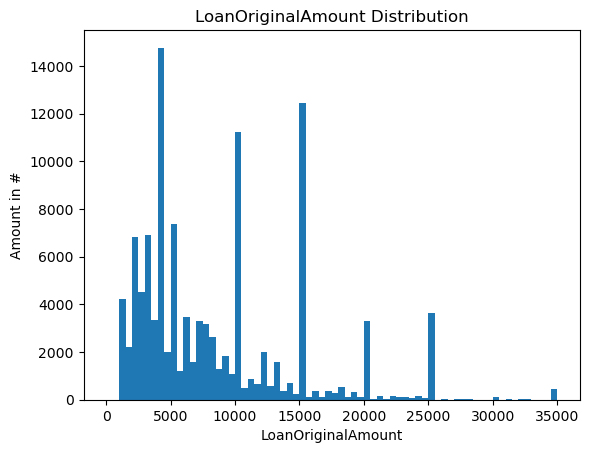

In [13]:
# plotting LoanOriginalAmount on a standard scale
binsize = 500
my_function('LoanOriginalAmount',binsize)
plt.ylabel('Amount in #');

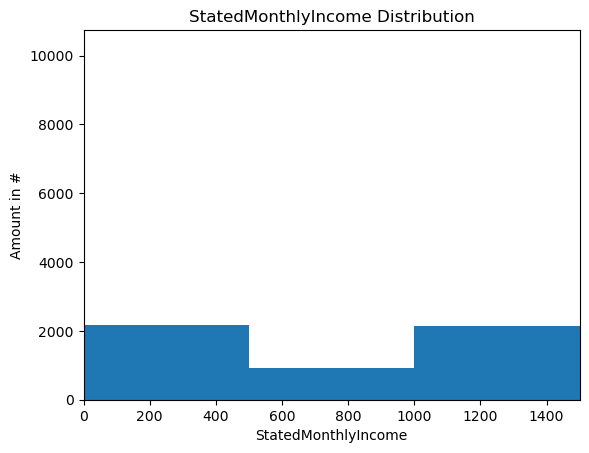

In [14]:
# Plot of StatedMonthlyIncome on Standard plot
my_function('StatedMonthlyIncome',binsize)
binsize = 50
plt.xlim(0,1500)
plt.ylabel('Amount in #' );


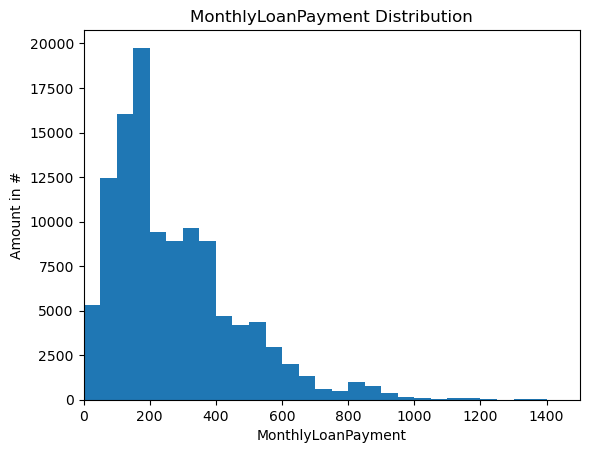

In [15]:
# Plot of MonthlyLoanPayment on Standard plot
my_function('MonthlyLoanPayment',binsize)
binsize = 100
plt.xlim(0,1500)
plt.ylabel('Amount in #');

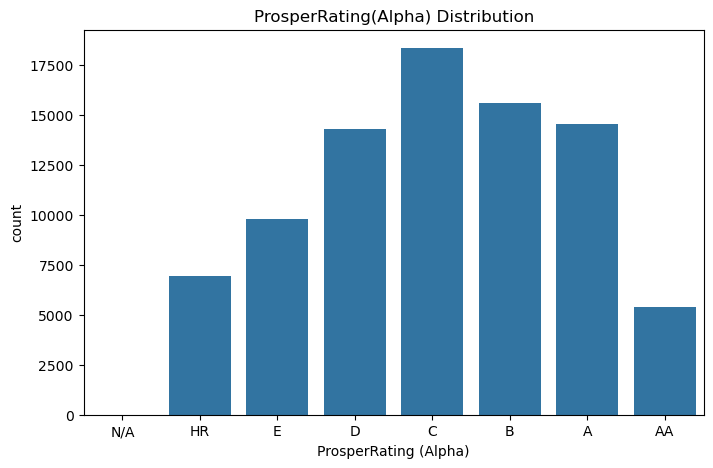

In [16]:
# plot the ProsperRating(Alpha) ordinal variable's distribution.
ax = plt.figure(figsize =[8,5])

default_color = sb.color_palette()[0]
sb.countplot(data = prosperloan, x = 'ProsperRating (Alpha)', color = default_color)
plt.title('ProsperRating(Alpha) Distribution');

The ProsperRating(Alpha) showed the highest peak at 'C'  followed by 'B', 'A' and 'D'

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations

BorrowerRate,LoanOriginalAmount,MonthlyLoanPayment and EmploymentStatusDuration were plotted using standard plot for visualization purpose.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
OnTimeProsperPayment showed points of gaps between the distribution on the log scale.



## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

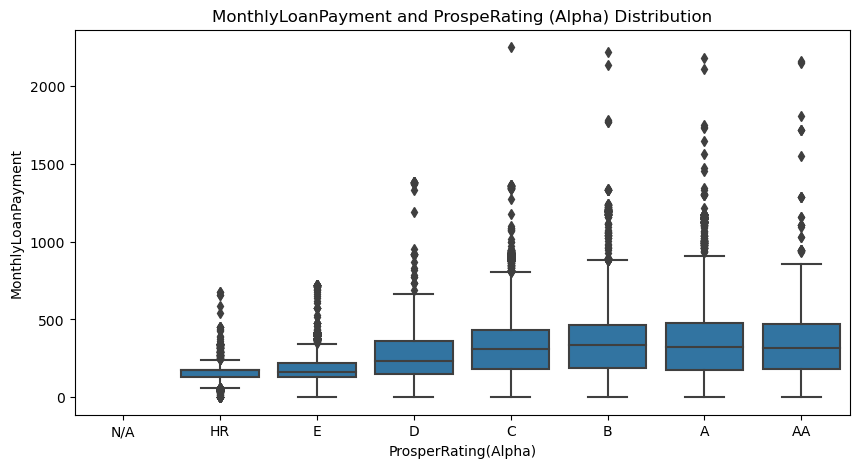

In [17]:
# A plot of MonthlyLoanPayment and ProsperRating (Alpha)
plt.figure(figsize = [10, 5])
sb.boxplot(data = prosperloan, y = 'MonthlyLoanPayment', x = 'ProsperRating (Alpha)', color = default_color)
plt.ylabel('MonthlyLoanPayment')
plt.xlabel('ProsperRating(Alpha)')
plt.title('MonthlyLoanPayment and ProspeRating (Alpha) Distribution')
plt.show();



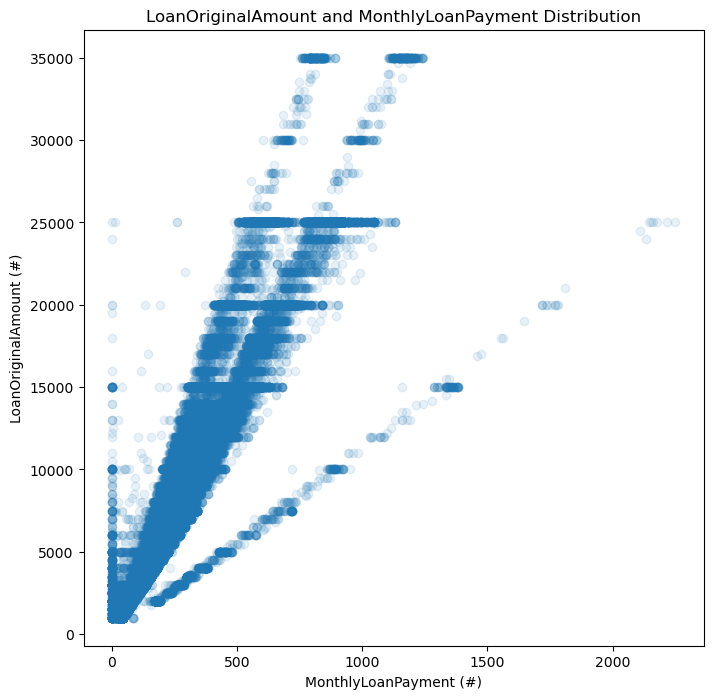

In [18]:
#  A plot of LoanOriginalAmount and MonthlyLoanPayment
plt.figure(figsize = [8,8])
plt.scatter(data = prosperloan, x = 'MonthlyLoanPayment', y = 'LoanOriginalAmount', alpha = 1/10)
plt.xlabel('MonthlyLoanPayment (#)')
plt.ylabel('LoanOriginalAmount (#)')
plt.title('LoanOriginalAmount and MonthlyLoanPayment Distribution')
plt.show()

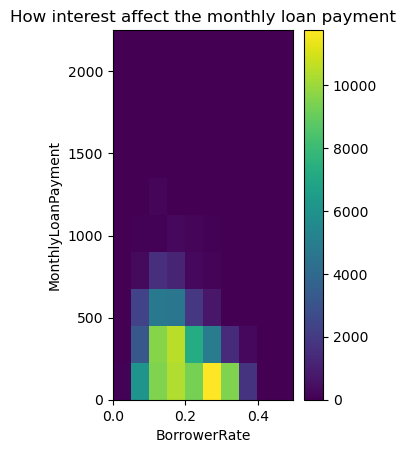

In [19]:
plt.subplot(1,2,2)
plt.hist2d(data=prosperloan,x='BorrowerRate',y='MonthlyLoanPayment')
plt.colorbar()
plt.xlabel('BorrowerRate')
plt.ylabel('MonthlyLoanPayment')
plt.title('How interest affect the monthly loan payment');

The graph shows that those with smaller interest rate takes more time to pay their loan.

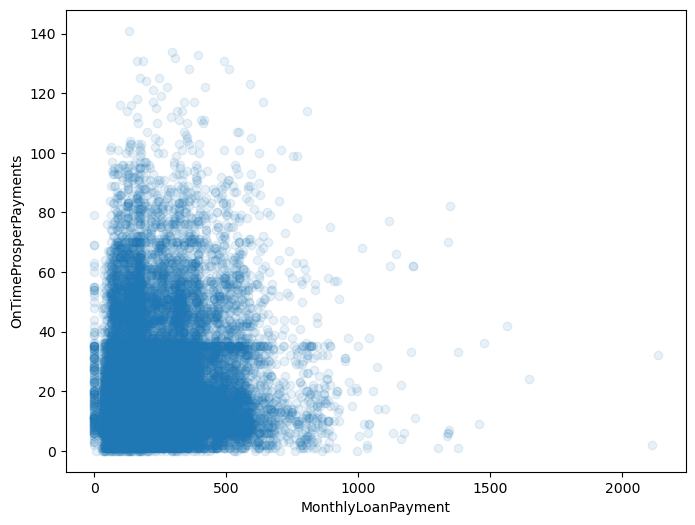

In [20]:
plt.figure(figsize = [8,6])
plt.scatter(data = prosperloan, x = 'MonthlyLoanPayment', y = 'OnTimeProsperPayments', alpha = 1/10)
plt.xlabel('MonthlyLoanPayment')
plt.ylabel('OnTimeProsperPayments')
plt.show()

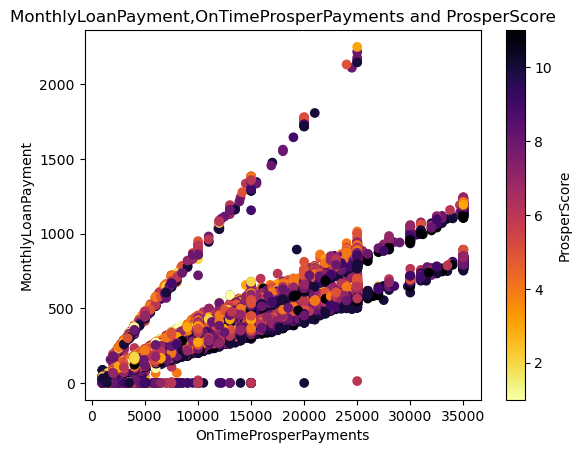

In [21]:
plt.scatter(data = prosperloan, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment', c = 'ProsperScore', cmap = 'inferno_r')
plt.colorbar(label ='ProsperScore')
plt.xlabel('OnTimeProsperPayments')
plt.ylabel('MonthlyLoanPayment')
plt.title('MonthlyLoanPayment,OnTimeProsperPayments and ProsperScore');

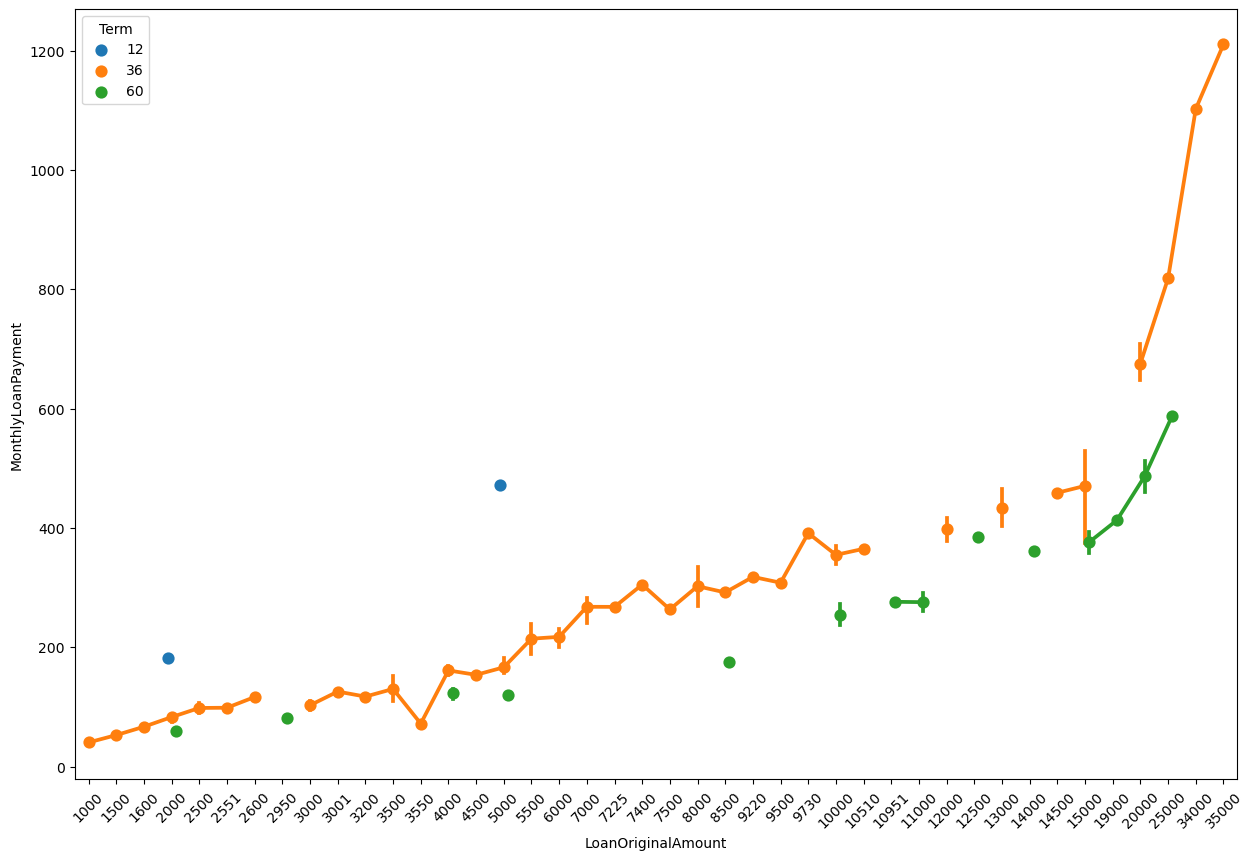

In [22]:
plt.figure(figsize = [15,10])
samples = np.random.choice(prosperloan.shape[0], 150, replace = False)
prosper_samp = prosperloan.loc[samples,:]
ax = sb.pointplot(data = prosper_samp, y = 'MonthlyLoanPayment', x = 'LoanOriginalAmount', hue = 'Term', dodge = 0.3, linestyle = '')
plt.ylabel('MonthlyLoanPayment')
ax.set_yticklabels([],minor = True)
plt.xticks(rotation = 45)
plt.show();


From the distribution, most MonthlyLoanPayment were possible in 36 months irrespective of the LoanOriginalAmount.



### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

There were positive correlation between OnTimeProsperPayments and MonthlyLoanPayment at different levels of ProsperRating.


## Conclusions


Some numerical variables('EmploymentStatusDuration','LoanOriginalAmount','StatedMonthlyIncome','MonthlyLoanPayment',) and categorical variables ('BorrowerRate'ProsperRating (Alpha)') of the ProsperLoan Dataset were analysed to predict the effect on OnTimeProsperPayments.


